# Consigna TP1

<b> Parte 1 (imágenes en white_patch y coord_cromaticas) </b>
<ol>
    <li>Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste. </li>
    <li>Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación. </li>
    <li>Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch </li>
</ol>

<b> Parte 2: </b>
<ol>
    <li> Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. </li>
    <li> Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas? </li>
    <li> Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas. </li>
</ol>




# Importo librerías a utilizar

In [93]:
#Si queremos que las imágenes sean mostradas en una ventana emergente descomentar el inline
# %matplotlib

import numpy as np  # OpenCV-Python utiliza NumPy para el manejo de imágenes
import cv2 as cv    # cv2 es el módulo python para acceder a OpenCV 
import matplotlib.pyplot as plt # Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc

from mpl_toolkits.axes_grid1 import ImageGrid

# Parte 1

## Cargo imagenes

In [14]:
# Cargar una imagen en modo RGB
p1_imgR = cv.cvtColor(cv.imread('./white_patch/test_red.png'), cv.COLOR_BGR2RGB)
p1_imgB = cv.cvtColor(cv.imread('./white_patch/test_blue.png'), cv.COLOR_BGR2RGB)
p1_imgG = cv.cvtColor(cv.imread('./white_patch/test_green.png'), cv.COLOR_BGR2RGB)

### Transformación cromática

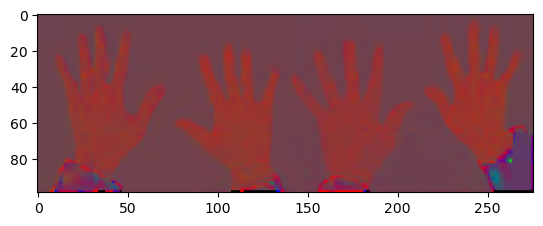

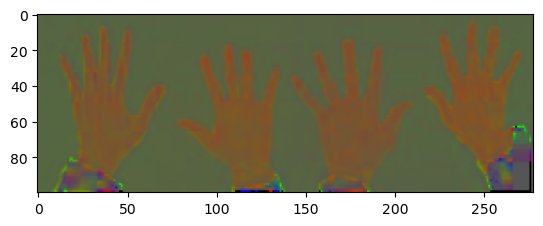

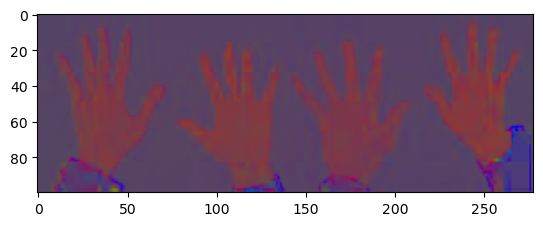

array([[[ 86,  64, 103],
        [ 85,  66, 102],
        [ 85,  66, 102],
        ...,
        [ 86,  66, 102],
        [ 86,  66, 102],
        [ 86,  68, 100]],

       [[ 86,  66, 102],
        [ 85,  67, 101],
        [ 85,  67, 101],
        ...,
        [ 86,  67, 101],
        [ 86,  67, 101],
        [ 86,  68,  99]],

       [[ 86,  66, 102],
        [ 85,  67, 101],
        [ 85,  67, 101],
        ...,
        [ 86,  67, 101],
        [ 86,  67, 101],
        [ 86,  68,  99]],

       ...,

       [[ 84,  70, 100],
        [ 84,  69, 100],
        [ 84,  69, 101],
        ...,
        [ 75,  60, 120],
        [ 51,   0, 204],
        [ 80,  80,  95]],

       [[ 84,  69, 100],
        [ 84,  70, 100],
        [ 84,  69, 100],
        ...,
        [ 69,  46, 139],
        [  0,   0, 255],
        [ 81,  75,  97]],

       [[ 84,  70, 100],
        [ 84,  70,  99],
        [ 84,  69, 100],
        ...,
        [ 76,  63, 114],
        [ 63,  31, 159],
        [ 81,  76,  96]]

In [80]:
def ChromaticTransform(im, plot=False):
    im_np = np.array(im)
    sum = np.sum(im_np, axis=2)
    sum[np.where(sum==0)] = 1   # Remove zeros before dividing
    im_out = np.stack([ np.uint8(np.divide(im_np[:,:,0], sum)*255),  np.uint8(np.divide(im_np[:,:,1], sum)*255),  np.uint8(np.divide(im_np[:,:,2],sum)*255)], axis=2)

    if(plot):
        plt.imshow(im_out)
        plt.show()
    return im_out
    


ChromaticTransform(p1_imgR, True)
ChromaticTransform(p1_imgG, True)
ChromaticTransform(p1_imgB, True)

### White Patch

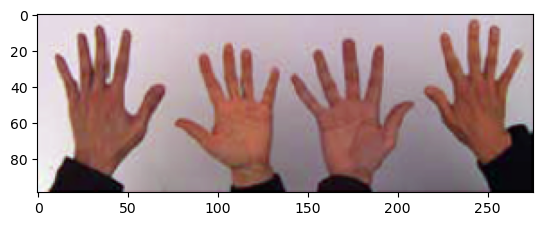

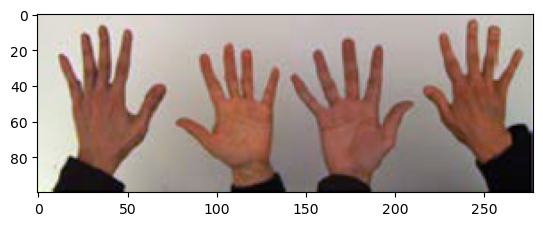

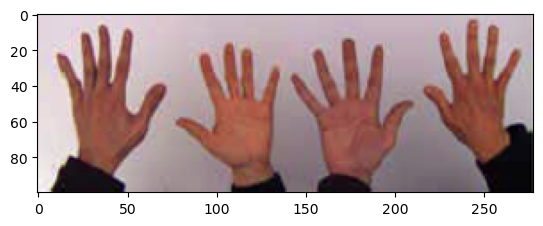

array([[[214, 194, 214],
        [222, 205, 219],
        [222, 205, 219],
        ...,
        [196, 181, 191],
        [193, 177, 189],
        [205, 194, 197]],

       [[219, 201, 216],
        [227, 212, 221],
        [227, 212, 221],
        ...,
        [200, 188, 195],
        [197, 184, 192],
        [210, 201, 201]],

       [[219, 201, 216],
        [227, 212, 221],
        [227, 212, 221],
        ...,
        [200, 188, 195],
        [197, 184, 192],
        [210, 201, 201]],

       ...,

       [[234, 232, 229],
        [239, 236, 234],
        [239, 234, 237],
        ...,
        [  7,   7,  10],
        [  1,   0,   5],
        [ 24,  29,  24]],

       [[236, 234, 233],
        [241, 238, 234],
        [245, 242, 242],
        ...,
        [  4,   3,   7],
        [  0,   0,   3],
        [ 23,  25,  22]],

       [[238, 236, 233],
        [242, 240, 235],
        [247, 243, 242],
        ...,
        [  9,   9,  11],
        [  3,   1,   6],
        [ 26,  29,  25]]

In [88]:
# Image must be RGB
def WhitePatch(im, plot=False):
    im_np = np.array(im)
    max_r = im_np[:,:,0].max()
    max_g = im_np[:,:,1].max()
    max_b = im_np[:,:,2].max()
    im_out = np.stack([ np.uint8(np.divide(im_np[:,:,0], max_r)*255),  np.uint8(np.divide(im_np[:,:,1], max_g)*255),  np.uint8(np.divide(im_np[:,:,2],max_b)*255)], axis=2)

    if(plot):
        plt.imshow(im_out)
        plt.show()
    return im_out
    
WhitePatch(p1_imgR, True)
WhitePatch(p1_imgG, True)
WhitePatch(p1_imgB, True)


## Combinación de algoritmos

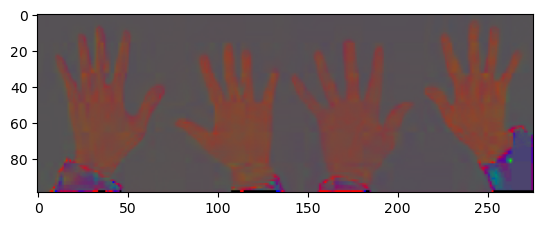

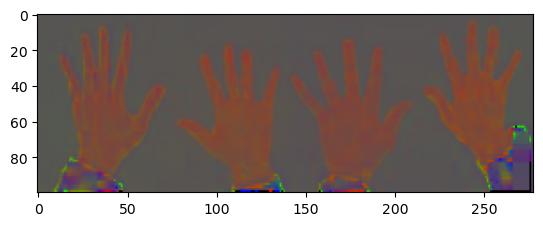

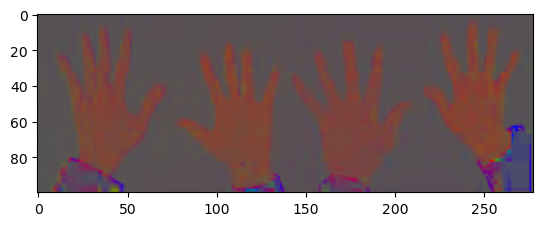

array([[[ 87,  79,  87],
        [ 87,  80,  86],
        [ 87,  80,  86],
        ...,
        [ 87,  81,  85],
        [ 88,  80,  86],
        [ 87,  83,  84]],

       [[ 87,  80,  86],
        [ 87,  81,  85],
        [ 87,  81,  85],
        ...,
        [ 87,  82,  85],
        [ 87,  81,  85],
        [ 87,  83,  83]],

       [[ 87,  80,  86],
        [ 87,  81,  85],
        [ 87,  81,  85],
        ...,
        [ 87,  82,  85],
        [ 87,  81,  85],
        [ 87,  83,  83]],

       ...,

       [[ 85,  85,  84],
        [ 85,  84,  84],
        [ 85,  84,  85],
        ...,
        [ 74,  74, 106],
        [ 42,   0, 212],
        [ 79,  96,  79]],

       [[ 85,  84,  84],
        [ 86,  85,  83],
        [ 85,  84,  84],
        ...,
        [ 72,  54, 127],
        [  0,   0, 255],
        [ 83,  91,  80]],

       [[ 85,  85,  84],
        [ 86,  85,  83],
        [ 86,  84,  84],
        ...,
        [ 79,  79,  96],
        [ 76,  25, 153],
        [ 82,  92,  79]]

In [87]:
ChromaticTransform(WhitePatch(p1_imgR), True)
ChromaticTransform(WhitePatch(p1_imgG), True)
ChromaticTransform(WhitePatch(p1_imgB), True)

## Conclusiones

El algoritmo de Transformación crómatica logra en cierta medida independizarnos del contraste de la imagen, pudiendo capturar los objetos que están presentes.
Por otro lado, el algoritmo White Patch logra independizarnos del color de la fuente de iluminación que se usó al momento de capturar la imagen. Esto se puede ver claramente con las imágenes de prueba, donde luego de pasarlas por White Patch, obtenemos 3 imágenes muy similares en cuanto a color. De hecho, se puede apreciar que el color de las manos es lo que se esperaría tener de la piel humana.
Sin embargo, este algoritmo puede llegar a resultar insuficiente si alguno de los 3 canales está saturado, ya que no se puede realizar una compensación de color para ese canal.

# Parte 2

<ol>
    <li> Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. </li>
    <li> Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas? </li>
    <li> Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas. </li>
</ol>

In [92]:
def image_grid(array, ncols=4):
    index, height, width, channels = array.shape
    nrows = index//ncols
    
    img_grid = (array.reshape(nrows, ncols, height, width, channels)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    
    return img_grid

## Punto 1

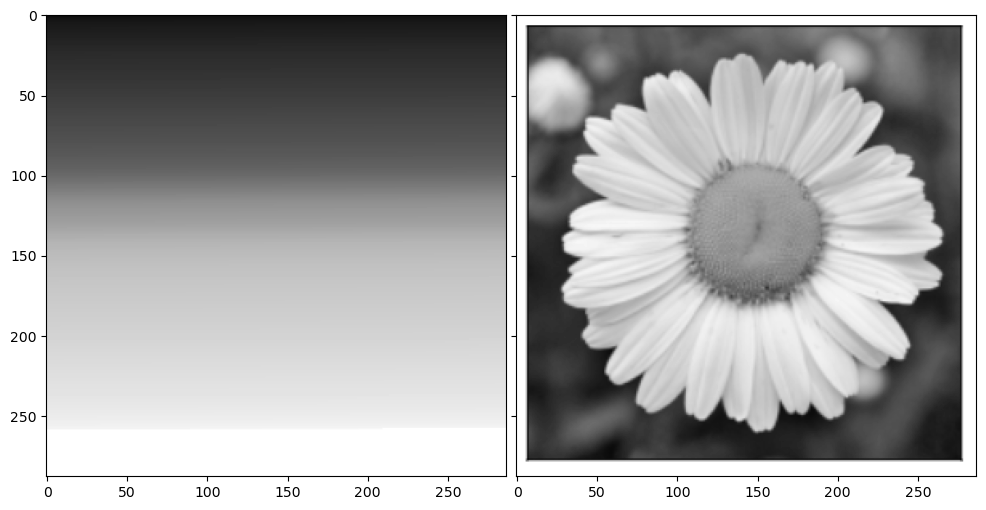

In [112]:
img1 = cv.imread('./img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('./img2_tp.png', cv.IMREAD_GRAYSCALE)
img_arr = [img1, img2]

fig = plt.figure(figsize=(12., 12.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )
for ax, im in zip(grid, img_arr):
    ax.imshow(im, cmap='gray')
plt.show()

## Punto 2

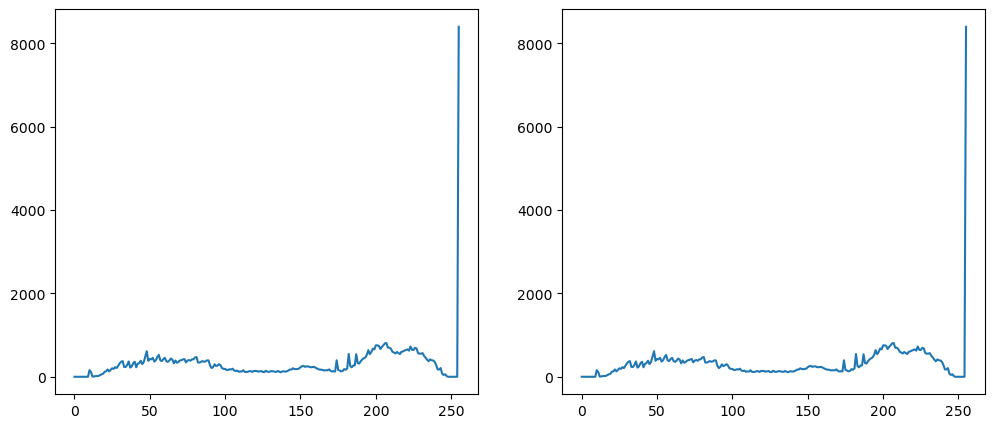

<Figure size 1200x1200 with 0 Axes>

In [113]:
hist1 = cv.calcHist([img1], [0], mask=None, histSize= [256], ranges=[0,256])
hist2 = cv.calcHist([img2], [0], mask=None, histSize= [256], ranges=[0,256])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist1)
plt.subplot(1,2,2)
plt.plot(hist2)
plt.show()

fig = plt.figure(figsize=(12., 12.))
plt.show()

Se eligió un histograma con 256 bins para tener mayor resolución al comparar ambos histogramas. Sin embargo, se puede apreciar que ambas imagenes, a pesar de ser muy distintas en cuanto a los objetos que contienen, tienen exactamente el mismo histograma.
Por lo tanto, el histograma no sería un muy parámetro para usar en un algoritmo de detección de objetos o clasificación, ya que en este caso no nos ofrece información. Sin embargo, en un caso distinto, los histogramas puede ser de utilidad para verificar la existencia de un objeto o no (por ejemplo la existencia o nó de un morrón rojo en un fondo negro se podría clasificar a partir de un histograma). Por lo tanto, es necesario conocer la aplicación para poder determinar la utilidad del histograma.

## Punto 3

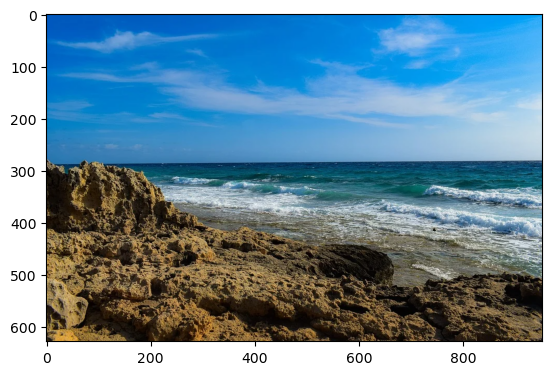

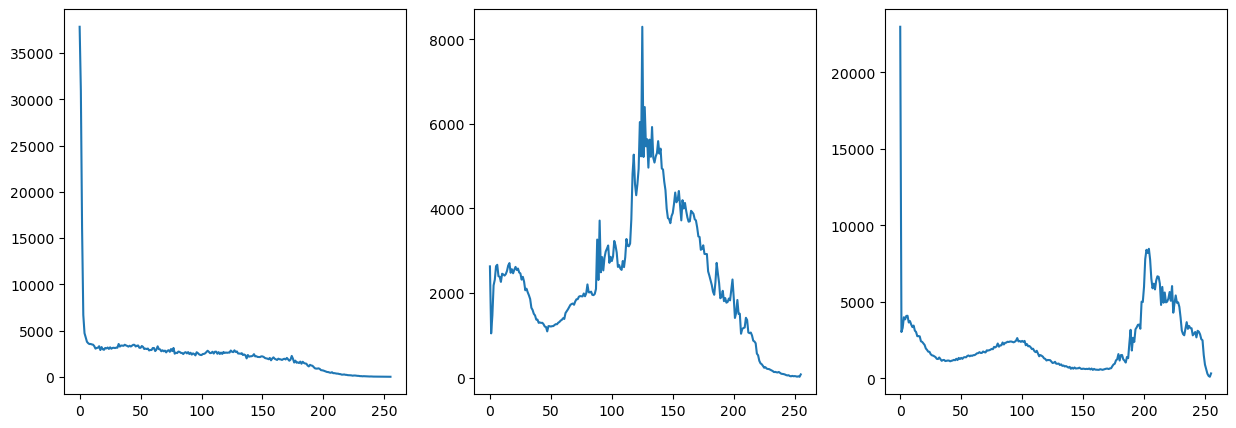

In [126]:
img = cv.cvtColor(cv.imread('./segmentacion.png'), cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

r_hist = cv.calcHist([img[:,:,0]], [0], mask=None, histSize= [256], ranges=[0,256])
g_hist = cv.calcHist([img[:,:,1]], [0], mask=None, histSize= [256], ranges=[0,256])
b_hist = cv.calcHist([img[:,:,2]], [0], mask=None, histSize= [256], ranges=[0,256])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(r_hist)
plt.subplot(1,3,2)
plt.plot(g_hist)
plt.subplot(1,3,3)
plt.plot(b_hist)

Los histogramas de los canales RGB no aportan gran información ya que la imagen tiene una composición de colores muy compleja.
Para intentar determinar algo de información para poder separar los distintos planos de la imagen, es más provechoso convertir la imagen a un espacio de colores tipo HSV y analizar a partir de ahí lo límites entre cada plano (cielo, agua, tierra).

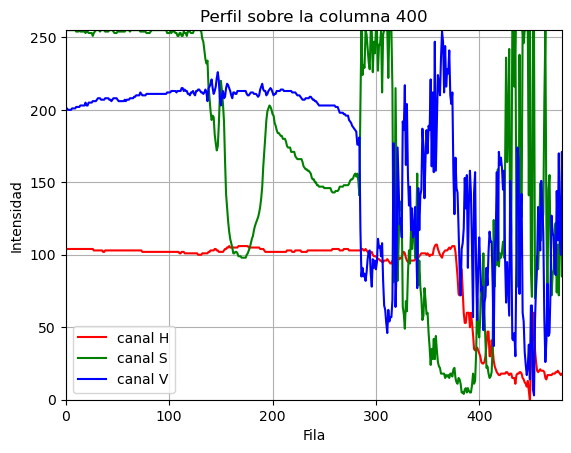

In [130]:
# Convierto imagen a HSV
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

idx_col = 400
perfil_color = img_hsv[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal H')
plt.plot(perfil_color[:,1], color='g', label='canal S')
plt.plot(perfil_color[:,2], color='b', label='canal V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 480)
plt.ylim(0, 255)
plt.legend()
plt.show()

(628, 953) (628, 953, 3)


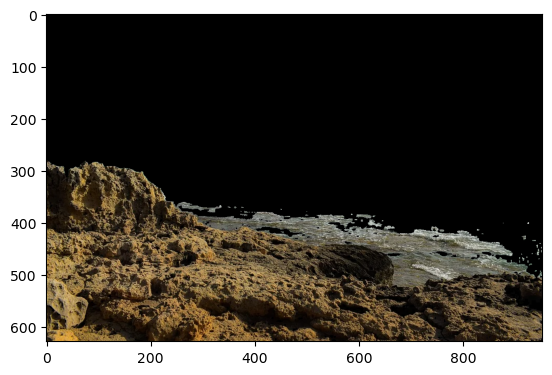

In [173]:
# La separación entre cielo y tierra se puede realizar de forma relativamente sencilla usando el HUE de la imagen.
threshold_land = 75
hue = np.array(img_hsv[:,:,0])
mask_land = np.zeros((hue.shape[0], hue.shape[1]), dtype="uint8")
mask_land[np.where(hue < threshold_land)] = 1
print(mask_land.shape, img_hsv.shape)
img_land = cv.bitwise_and(img, img, mask= mask_land)
plt.imshow(img_land)
plt.show()

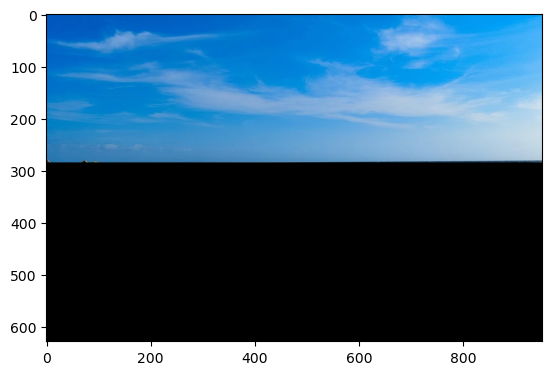

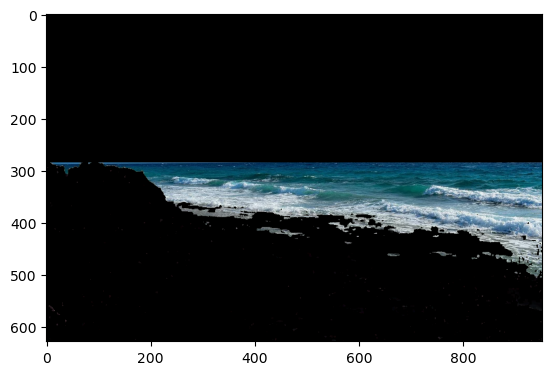

In [183]:
# Sin embargo, la diferencia entre el cielo y el agua no es tán notoria. Particularmente, resulta muy dificil utilizar el HUE para separa ya que
# el cielo y el mar tienen colores similares. Además, tanto el cielo como el agua tienen partes más oscuras y más blancas.
# Sin embargo, el cielo es en general más claro. Además, la linea del horizonte se puede notar como un azul oscuro bien definido.
# Por lo tanto, en el perfil de colores HSV obtenido anteriormente, podemos ver que la linea del horizonte está bien marcada por una caída 
# abrupta de la iluminancia de color (V). Esta caída abrupta se encuentra aproximadamente en el pixel 282

mask_not_land = np.zeros((hue.shape[0], hue.shape[1]), dtype="uint8")
mask_not_land[np.where(hue > threshold_land)] = 1
img_not_land = cv.bitwise_and(img, img, mask= mask_not_land)

mask_sky = np.zeros((hue.shape[0], hue.shape[1]), dtype="uint8")
mask_sky[:285,:] = 1
img_sky = cv.bitwise_and(img, img, mask= mask_sky)
plt.imshow(img_sky)
plt.show()

mask_sea = np.zeros((hue.shape[0], hue.shape[1]), dtype="uint8")
mask_sea[285:,:] = 1
img_sea = cv.bitwise_and(img_not_land, img_not_land, mask= mask_sea)
plt.imshow(img_sea)
plt.show()

Aunque esta separación entre mar y cielo es básica, funciona bien para la imagen en cuestión. Sin embargo, no sería un método apropiado ya que,
si la imagen no está completamente horizontal respecto al horizonte, la separación no funcionaría.